In [2]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\91944\OneDrive\Desktop\Sudheer\Side Projects\Adidas\Dataset\Adidas US Sales Datasets.xlsx'
data = pd.read_excel(file_path)

# Display the shape of the DataFrame
print("Shape of the DataFrame:", data.shape)

# Display the first few rows of the dataset
print("\nHead of the dataset:")
print(data.head())

# Display the last few rows of the dataset
print("\nTail of the dataset:")
print(data.tail())

# Check for duplicate values
duplicates = data.duplicated().sum()
print("\nNumber of duplicate entries:", duplicates)

# Display detailed information about the dataset
print("\nDataset Info:")
data.info()

# Check for null values
null_values = data.isnull().sum()
print("\nNull values in each column:")
print(null_values)

# Remove non-numeric characters and convert columns to numeric
columns_to_clean = ['Total Sales', 'Units Sold', 'Operating Profit', 'Operating Margin']
for column in columns_to_clean:
    data[column] = data[column].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Convert 'Invoice Date' to datetime format
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

# Describe the dataset to get statistical summary
print("\nStatistical Summary:")
print(data.describe())

# Save cleaned data to a new file (optional)
output_path = r'C:\Users\91944\OneDrive\Desktop\Sudheer\Side Projects\Adidas\Cleaned_Adidas_Sales_Dataset.xlsx'
data.to_excel(output_path, index=False)
print("\nCleaned dataset saved to:", output_path)


Shape of the DataFrame: (9648, 13)

Head of the dataset:
      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method  


In [2]:
### Section 1: Customer Purchase Patterns Analysis

In [6]:
# Step 1: Calculate Frequency of Purchases
# Here we assume that each row in the dataset represents a single transaction
# We'll group by 'Retailer ID' to calculate the number of purchases for each customer

# Calculate frequency
purchase_frequency = data.groupby('Retailer')['Invoice Date'].count().reset_index(name='Purchase Frequency')

# Display the frequency of purchases
print("\nPurchase Frequency:\n", purchase_frequency.head())


Purchase Frequency:
         Retailer  Purchase Frequency
0         Amazon                 949
1    Foot Locker                2637
2         Kohl's                1030
3  Sports Direct                2032
4        Walmart                 626


C:\Users\91944\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


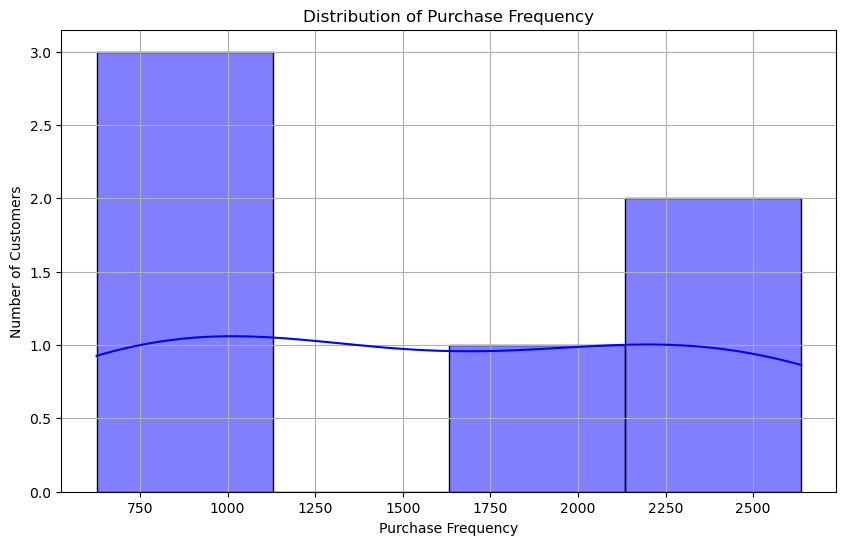

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Visualize the distribution of Purchase Frequency
plt.figure(figsize=(10, 6))
sns.histplot(purchase_frequency['Purchase Frequency'], kde=True, color='blue')
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


In [4]:
# Step 2: Calculate Recency of Purchases
# Recency is calculated as the number of days since the customer's last purchase
# We'll use the 'Invoice Date' column for this purpose

# Convert 'Invoice Date' to datetime format if not already done
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

# Find the most recent date in the dataset
most_recent_date = data['Invoice Date'].max()

# Calculate the recency for each customer
recency = data.groupby('Retailer')['Invoice Date'].max().reset_index()
recency['Recency'] = (most_recent_date - recency['Invoice Date']).dt.days

# Display the recency of purchases
print("\nRecency of Purchases:\n", recency.head())



Recency of Purchases:
         Retailer Invoice Date  Recency
0         Amazon   2021-12-31        0
1    Foot Locker   2021-12-31        0
2         Kohl's   2021-12-25        6
3  Sports Direct   2021-12-25        6
4        Walmart   2021-12-16       15


C:\Users\91944\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


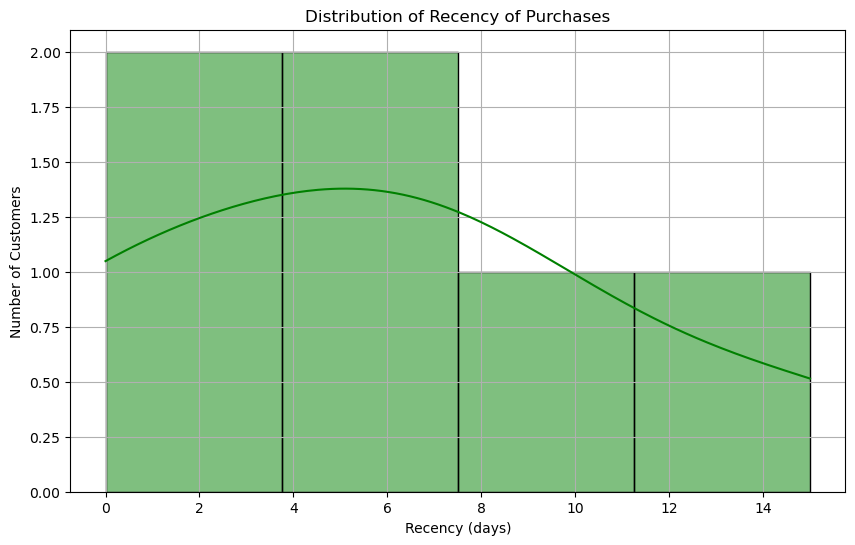

In [10]:
# Visualize the distribution of Recency of Purchases
plt.figure(figsize=(10, 6))
sns.histplot(recency['Recency'], kde=True, color='green')
plt.title('Distribution of Recency of Purchases')
plt.xlabel('Recency (days)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


In [5]:
# Step 3: Calculate Monetary Value of Purchases
# Monetary value is calculated as the total amount spent by each customer
# We'll use the 'Total Sales' column for this purpose

# Calculate monetary value
monetary_value = data.groupby('Retailer')['Total Sales'].sum().reset_index()

# Display the monetary value of purchases
print("\nMonetary Value of Purchases:\n", monetary_value.head())



Monetary Value of Purchases:
         Retailer  Total Sales
0         Amazon   77698912.0
1    Foot Locker  220094720.0
2         Kohl's  102114753.0
3  Sports Direct  182470997.0
4        Walmart   74558410.0


C:\Users\91944\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


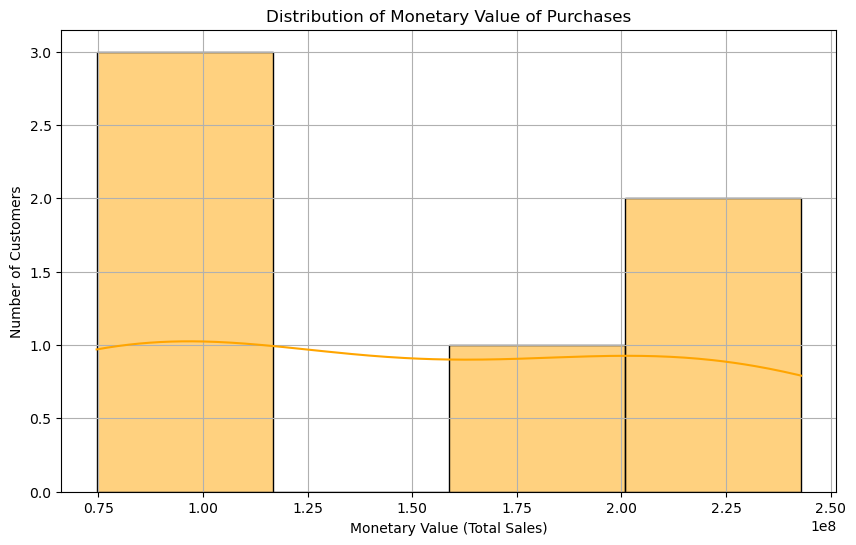

In [11]:
# Visualize the distribution of Monetary Value of Purchases
plt.figure(figsize=(10, 6))
sns.histplot(monetary_value['Total Sales'], kde=True, color='orange')
plt.title('Distribution of Monetary Value of Purchases')
plt.xlabel('Monetary Value (Total Sales)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


In [6]:
# Step 4: Combine Frequency, Recency, and Monetary Value into a Single DataFrame
customer_purchase_patterns = purchase_frequency.merge(recency, on='Retailer')
customer_purchase_patterns = customer_purchase_patterns.merge(monetary_value, on='Retailer')

# Display the combined DataFrame
print("\nCustomer Purchase Patterns:\n", customer_purchase_patterns.head())



Customer Purchase Patterns:
         Retailer  Purchase Frequency Invoice Date  Recency  Total Sales
0         Amazon                 949   2021-12-31        0   77698912.0
1    Foot Locker                2637   2021-12-31        0  220094720.0
2         Kohl's                1030   2021-12-25        6  102114753.0
3  Sports Direct                2032   2021-12-25        6  182470997.0
4        Walmart                 626   2021-12-16       15   74558410.0


In [7]:
# Step 5: Interpretation and Actionable Insights
# Provide some basic insights based on the calculated metrics
print("\nBasic Insights:")

# Frequency Insights
print("\nFrequency Insights:")
print(customer_purchase_patterns['Purchase Frequency'].describe())

# Recency Insights
print("\nRecency Insights:")
print(customer_purchase_patterns['Recency'].describe())

# Monetary Value Insights
print("\nMonetary Value Insights:")
print(customer_purchase_patterns['Total Sales'].describe())



Basic Insights:

Frequency Insights:
count       6.000000
mean     1608.000000
std       843.571218
min       626.000000
25%       969.250000
50%      1531.000000
75%      2288.500000
max      2637.000000
Name: Purchase Frequency, dtype: float64

Recency Insights:
count     6.000000
mean      5.833333
std       5.600595
min       0.000000
25%       1.500000
50%       6.000000
75%       7.500000
max      15.000000
Name: Recency, dtype: float64

Monetary Value Insights:
count    6.000000e+00
mean     1.499837e+08
std      7.459474e+07
min      7.455841e+07
25%      8.380287e+07
50%      1.422929e+08
75%      2.106888e+08
max      2.429643e+08
Name: Total Sales, dtype: float64


Sales and Units Sold by Price Range:
   Price Range  Total Sales  Units Sold
0        0-20    3100531.0     47615.0
1       20-40  102271690.0    588690.0
2       40-60  430319089.0   1220465.0
3       60-80  293063084.0    529559.0
4      80-100   62812525.0     83943.0
5     100-120    8335206.0      8589.0


<Figure size 1200x600 with 0 Axes>

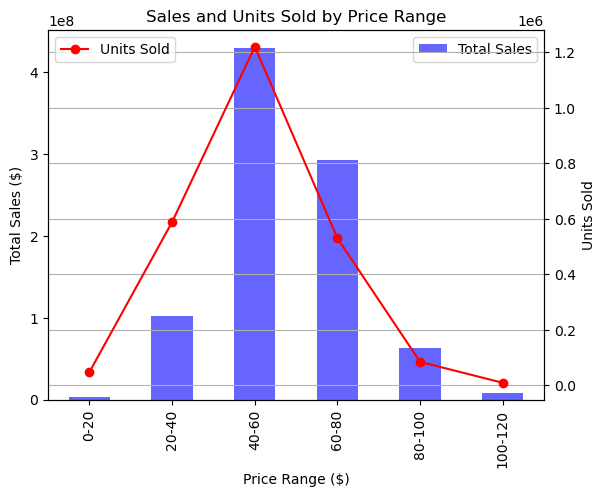

In [16]:
### Question 2: Detailed Price Sensitivity Analysis

import pandas as pd
import matplotlib.pyplot as plt

# Ensuring proper data types
data['Price per Unit'] = pd.to_numeric(data['Price per Unit'], errors='coerce')
data.dropna(subset=['Price per Unit'], inplace=True)  # Ensuring no null values in the price column

# Defining price bins
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-140', '140-160', '160-180', '180-200']
data['Price Range'] = pd.cut(data['Price per Unit'], bins=bins, labels=labels, right=False)

# Aggregating sales and units sold by the newly defined price bins
price_range_summary = data.groupby('Price Range', observed=True).agg({'Total Sales':'sum', 'Units Sold':'sum'}).reset_index()

# Display the summary
print("Sales and Units Sold by Price Range:\n", price_range_summary)

# Visualizing the data
plt.figure(figsize=(12, 6))
ax = price_range_summary.plot(x='Price Range', y='Total Sales', kind='bar', color='blue', label='Total Sales', alpha=0.6)
ax2 = ax.twinx()
price_range_summary.plot(x='Price Range', y='Units Sold', kind='line', marker='o', color='red', label='Units Sold', ax=ax2)
ax.set_xlabel('Price Range ($)')
ax.set_ylabel('Total Sales ($)')
ax2.set_ylabel('Units Sold')
ax.set_title('Sales and Units Sold by Price Range')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [19]:
### Elasticity Analysis for Detailed Price Sensitivity Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure there are no zero price changes which would lead to division by zero
data['Price Change %'] = data['Price per Unit'].pct_change()
data['Units Sold Change %'] = data['Units Sold'].pct_change()

# Remove cases where price change is zero (to avoid division by zero in elasticity calculation)
data = data[data['Price Change %'] != 0]

# Cleaning any remaining infinite or NaN values that could skew our analysis
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=['Price Change %', 'Units Sold Change %'], inplace=True)

# Calculating elasticity
data['Elasticity'] = data['Units Sold Change %'] / data['Price Change %']

# Calculate the average elasticity, ignoring any infinite or NaN values
average_elasticity = np.nanmean(data['Elasticity'])
print("Adjusted Average Price Elasticity of Demand:", average_elasticity)




Adjusted Average Price Elasticity of Demand: -2557762373562.359


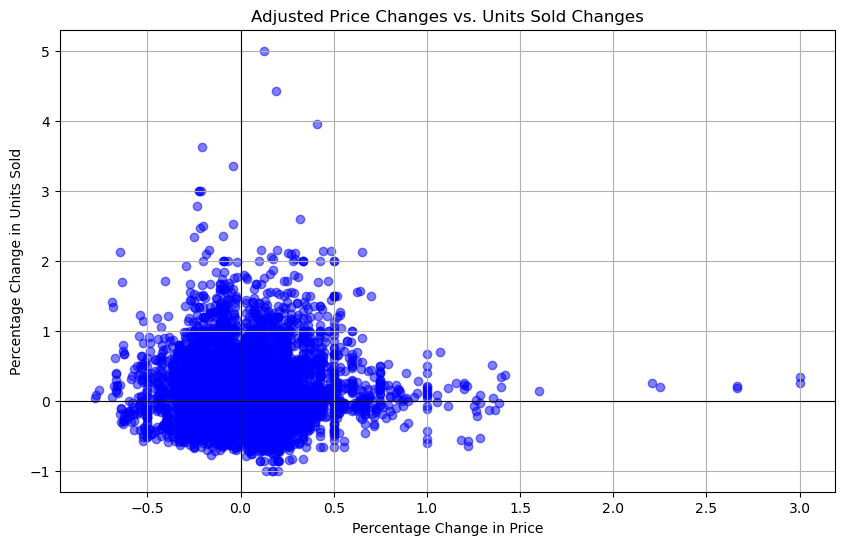

In [20]:
# Visualization to confirm the relationship between price changes and unit sold changes
plt.figure(figsize=(10, 6))
plt.scatter(data['Price Change %'], data['Units Sold Change %'], alpha=0.5, color='blue')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Adjusted Price Changes vs. Units Sold Changes')
plt.xlabel('Percentage Change in Price')
plt.ylabel('Percentage Change in Units Sold')
plt.grid(True)
plt.show()


In [22]:
### Optimal Pricing

# Identify the price range that maximizes total sales
optimal_sales_range = price_range_summary[price_range_summary['Total Sales'] == price_range_summary['Total Sales'].max()]
print("Optimal Price Range for Maximum Sales:\n", optimal_sales_range)

# Identify the price range that maximizes profit
# Adjusting the groupby operation to explicitly handle the 'observed' parameter
price_range_summary['Operating Profit'] = data.groupby('Price Range', observed=True)['Operating Profit'].sum().reset_index(drop=True)

optimal_profit_range = price_range_summary[price_range_summary['Operating Profit'] == price_range_summary['Operating Profit'].max()]
print("Optimal Price Range for Maximum Profit:\n", optimal_profit_range)


Optimal Price Range for Maximum Sales:
   Price Range  Total Sales  Units Sold  Operating Profit
2       40-60  430319089.0   1220465.0      1.203964e+08
Optimal Price Range for Maximum Profit:
   Price Range  Total Sales  Units Sold  Operating Profit
2       40-60  430319089.0   1220465.0      1.203964e+08


In [23]:
###  Business Problem 3: Retailer Performance and Benchmarking Analysis

### Retailer Comparison: Sales, Units Sold, and Profit Margins

# Group data by retailer and calculate total sales, units sold, and average profit margin
retailer_performance = data.groupby('Retailer').agg({
    'Total Sales': 'sum',
    'Units Sold': 'sum',
    'Operating Profit': 'sum'
})

# Calculate profit margin as a percentage of total sales
retailer_performance['Profit Margin'] = retailer_performance['Operating Profit'] / retailer_performance['Total Sales'] * 100

# Display the aggregated data
print("Retailer Performance Metrics:\n", retailer_performance)



Retailer Performance Metrics:
                Total Sales  Units Sold  Operating Profit  Profit Margin
Retailer                                                               
Amazon          61422394.0    159671.0       22928442.89      37.329126
Foot Locker    173979814.0    491138.0       64040741.25      36.809294
Kohl's          80894134.0    234930.0       28798894.52      35.600720
Sports Direct  143578449.0    460823.0       58903796.65      41.025514
Walmart         61829317.0    177116.0       21293022.02      34.438391
West Gear      198905864.0    526673.0       70101615.28      35.243614


In [24]:
### Performance Metrics: Key Performance Indicators (KPIs)

# Calculate additional KPIs such as average sale per unit and sales efficiency
retailer_performance['Average Sale per Unit'] = retailer_performance['Total Sales'] / retailer_performance['Units Sold']
retailer_performance['Sales Efficiency'] = retailer_performance['Units Sold'] / retailer_performance['Total Sales']

# Display these additional KPIs
print("Detailed Retailer KPIs:\n", retailer_performance[['Average Sale per Unit', 'Sales Efficiency']])



Detailed Retailer KPIs:
                Average Sale per Unit  Sales Efficiency
Retailer                                              
Amazon                    384.680963          0.002600
Foot Locker               354.238145          0.002823
Kohl's                    344.332925          0.002904
Sports Direct             311.569624          0.003210
Walmart                   349.089393          0.002865
West Gear                 377.664820          0.002648


In [25]:
### Benchmarking: Best Practices from Top Performers

# Identify top performers in terms of profit margin and sales efficiency
top_profit_margin = retailer_performance[retailer_performance['Profit Margin'] == retailer_performance['Profit Margin'].max()]
top_sales_efficiency = retailer_performance[retailer_performance['Sales Efficiency'] == retailer_performance['Sales Efficiency'].max()]

print("Top Performer by Profit Margin:\n", top_profit_margin)
print("Top Performer by Sales Efficiency:\n", top_sales_efficiency)

# Extract best practices based on common characteristics of top performers
# This might involve deeper analysis or qualitative assessments from market studies or operational reviews


Top Performer by Profit Margin:
                Total Sales  Units Sold  Operating Profit  Profit Margin  \
Retailer                                                                  
Sports Direct  143578449.0    460823.0       58903796.65      41.025514   

               Average Sale per Unit  Sales Efficiency  
Retailer                                                
Sports Direct             311.569624           0.00321  
Top Performer by Sales Efficiency:
                Total Sales  Units Sold  Operating Profit  Profit Margin  \
Retailer                                                                  
Sports Direct  143578449.0    460823.0       58903796.65      41.025514   

               Average Sale per Unit  Sales Efficiency  
Retailer                                                
Sports Direct             311.569624           0.00321  


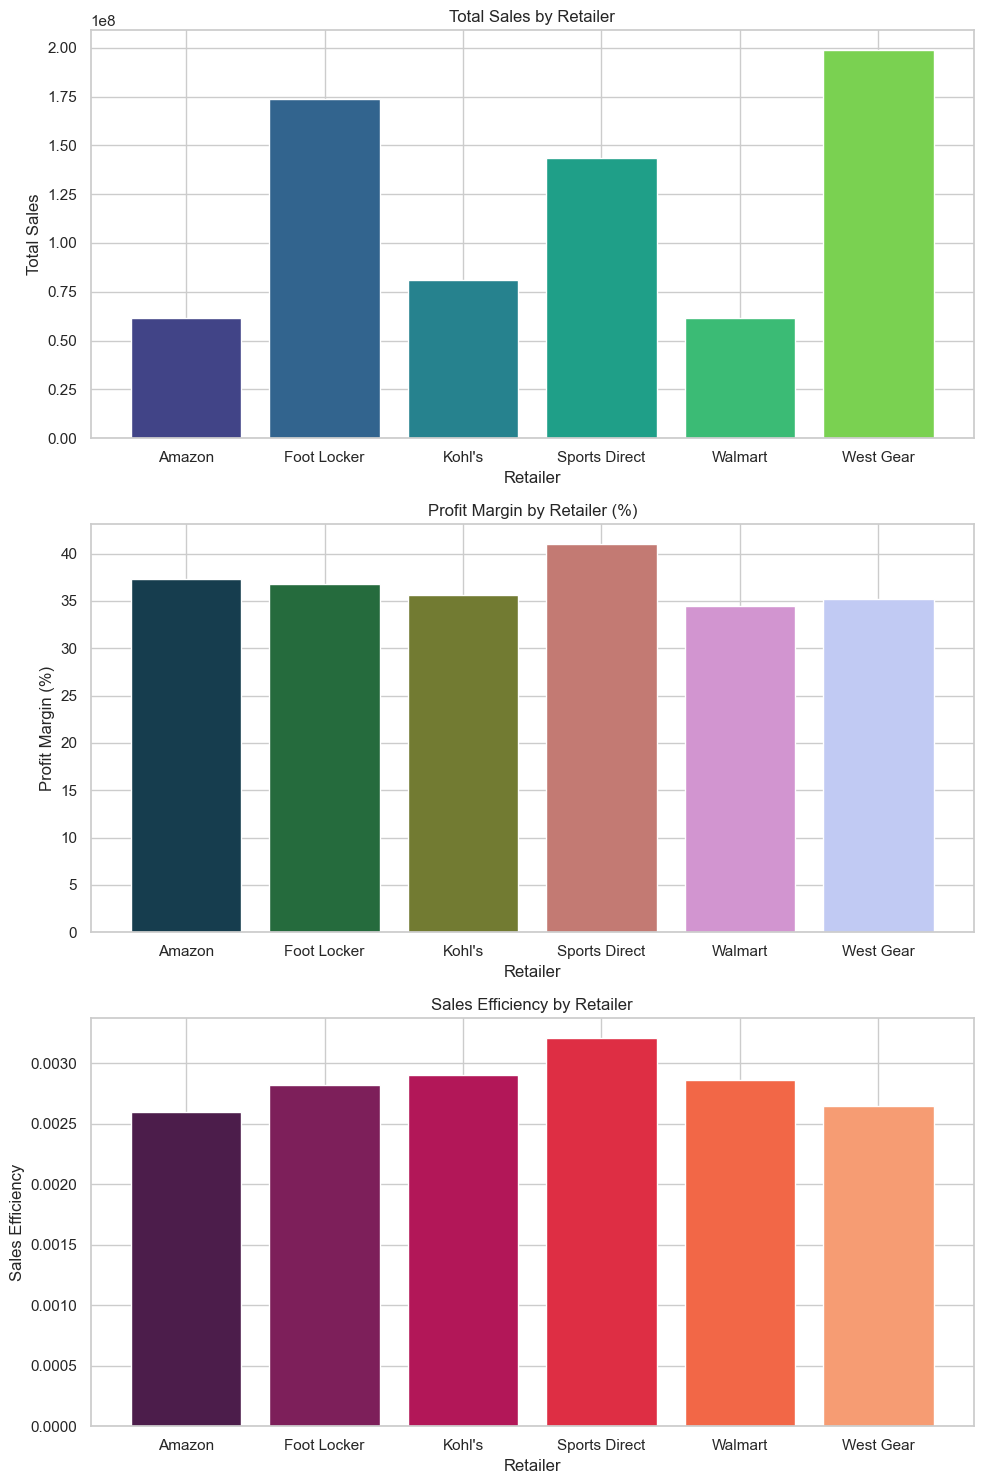

In [35]:
### Visualizing Retailer Performance Metrics

import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data
data = {
    'Retailer': ['Amazon', 'Foot Locker', 'Kohl\'s', 'Sports Direct', 'Walmart', 'West Gear'],
    'Total Sales': [61422394.0, 173979814.0, 80894134.0, 143578449.0, 61829317.0, 198905864.0],
    'Profit Margin': [37.329126, 36.809294, 35.600720, 41.025514, 34.438391, 35.243614],
    'Sales Efficiency': [0.002600, 0.002823, 0.002904, 0.003210, 0.002865, 0.002648]
}
df = pd.DataFrame(data)

# Creating a figure to hold our subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Define colors for consistency
colors = ['viridis', 'cubehelix', 'rocket']

# Plot Total Sales
ax[0].bar(df['Retailer'], df['Total Sales'], color=plt.get_cmap(colors[0])(np.linspace(0.2, 0.8, len(df))))
ax[0].set_title('Total Sales by Retailer')
ax[0].set_ylabel('Total Sales')
ax[0].set_xlabel('Retailer')

# Plot Profit Margin
ax[1].bar(df['Retailer'], df['Profit Margin'], color=plt.get_cmap(colors[1])(np.linspace(0.2, 0.8, len(df))))
ax[1].set_title('Profit Margin by Retailer (%)')
ax[1].set_ylabel('Profit Margin (%)')
ax[1].set_xlabel('Retailer')

# Plot Sales Efficiency
ax[2].bar(df['Retailer'], df['Sales Efficiency'], color=plt.get_cmap(colors[2])(np.linspace(0.2, 0.8, len(df))))
ax[2].set_title('Sales Efficiency by Retailer')
ax[2].set_ylabel('Sales Efficiency')
ax[2].set_xlabel('Retailer')

# Display the plot
plt.tight_layout()
plt.show()




In [46]:
### Business Question 4: Product Lifecycle Analysis

### Lifecycle Stages Definition 


import pandas as pd
import numpy as np

# Convert 'Invoice Date' to datetime if not already
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

# Define the current date for this analysis
current_date = pd.Timestamp.now()

# Categorizing the lifecycle stages of products
def categorize_lifecycle(date, current_date):
    if (current_date - date).days < 365:
        return 'Introduction'
    elif 365 <= (current_date - date).days < 730:
        return 'Growth'
    elif 730 <= (current_date - date).days < 1095:
        return 'Maturity'
    else:
        return 'Decline'

data['Lifecycle Stage'] = data['Invoice Date'].apply(lambda x: categorize_lifecycle(x, current_date))



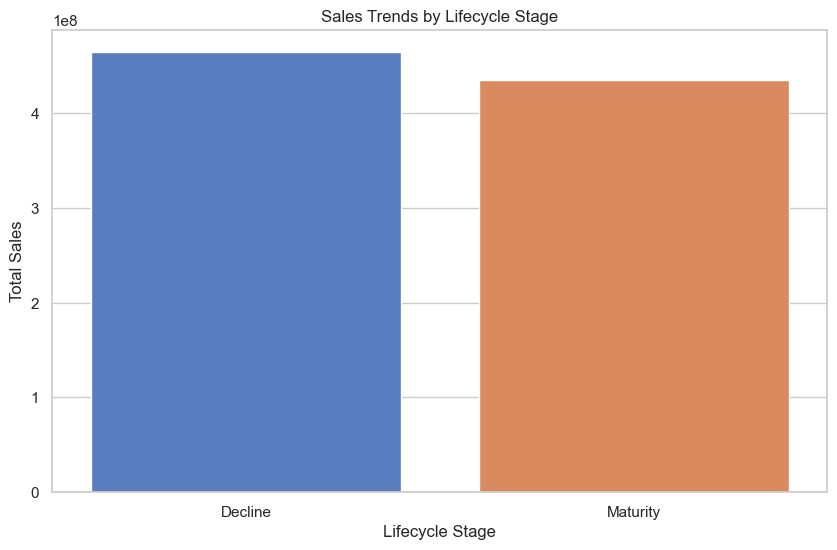

In [47]:
### Analyzing Sales Trends

import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by lifecycle stage and summing up sales
sales_trends = data.groupby('Lifecycle Stage')['Total Sales'].sum().reset_index()

# Plotting the sales trends by lifecycle stage
plt.figure(figsize=(10, 6))
sns.barplot(x='Lifecycle Stage', y='Total Sales', data=sales_trends, palette='muted')
plt.title('Sales Trends by Lifecycle Stage')
plt.xlabel('Lifecycle Stage')
plt.ylabel('Total Sales')
plt.show()


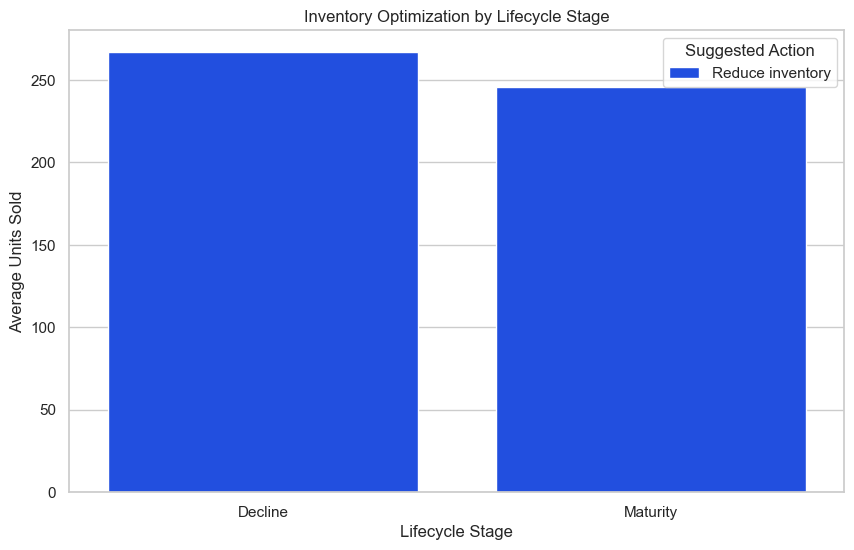

In [48]:
### Optimizing Inventory Management

# Assuming inventory data needs to be managed based on sales trends
inventory_optimization = data.groupby('Lifecycle Stage').agg({
    'Units Sold': 'mean'
}).rename(columns={'Units Sold': 'Average Units Sold'}).reset_index()

# Suggest actions based on lifecycle stage
inventory_optimization['Inventory Action'] = inventory_optimization['Lifecycle Stage'].apply(
    lambda x: 'Increase inventory' if x in ['Introduction', 'Growth'] else 'Reduce inventory'
)

# Displaying the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Lifecycle Stage', y='Average Units Sold', hue='Inventory Action', data=inventory_optimization, palette='bright')
plt.title('Inventory Optimization by Lifecycle Stage')
plt.xlabel('Lifecycle Stage')
plt.ylabel('Average Units Sold')
plt.legend(title='Suggested Action')
plt.show()


In [49]:
### Business Problem 5: Sales Method Analysis By Region

# Grouping data by region and sales method to analyze total sales and units sold
regional_sales = data.groupby(['Region', 'Sales Method']).agg({
    'Total Sales': 'sum',
    'Units Sold': 'sum'
}).reset_index()
print(regional_sales)


       Region Sales Method  Total Sales  Units Sold
0     Midwest     In-store   59554000.0      145205
1     Midwest       Online   40253459.0      165992
2     Midwest       Outlet   35993000.0       80140
3   Northeast     In-store  115950750.0      229955
4   Northeast       Online    4626777.0       94150
5   Northeast       Outlet   65746540.0      177174
6       South     In-store    3393750.0        6825
7       South       Online   59838835.0      204959
8       South       Outlet   81430596.0      280476
9   Southeast     In-store   72361250.0      119460
10  Southeast       Online   83900210.0      244456
11  Southeast       Outlet    6909776.0       43084
12       West     In-store  105384000.0      188545
13       West       Online   59053601.0      229536
14       West       Outlet  105505581.0      268904


In [50]:
### Method Efficiency

# Calculating operating profit along with total sales for deeper insights
method_efficiency = data.groupby(['Region', 'Sales Method']).agg({
    'Total Sales': 'sum',
    'Operating Profit': 'sum'
}).reset_index()
method_efficiency['Profit Margin'] = (method_efficiency['Operating Profit'] / method_efficiency['Total Sales']) * 100
print(method_efficiency)


       Region Sales Method  Total Sales  Operating Profit  Profit Margin
0     Midwest     In-store   59554000.0       23165650.00      38.898563
1     Midwest       Online   40253459.0       15544533.98      38.616642
2     Midwest       Outlet   35993000.0       14101162.50      39.177514
3   Northeast     In-store  115950750.0       42544200.00      36.691613
4   Northeast       Online    4626777.0        2246831.65      48.561486
5   Northeast       Outlet   65746540.0       23229556.00      35.331982
6       South     In-store    3393750.0        1348000.00      39.720074
7       South       Online   59838835.0       23993943.22      40.097611
8       South       Outlet   81430596.0       35796060.85      43.958982
9   Southeast     In-store   72361250.0       25582562.50      35.353953
10  Southeast       Online   83900210.0       32693515.38      38.967144
11  Southeast       Outlet    6909776.0        2279338.82      32.987159
12       West     In-store  105384000.0       34950

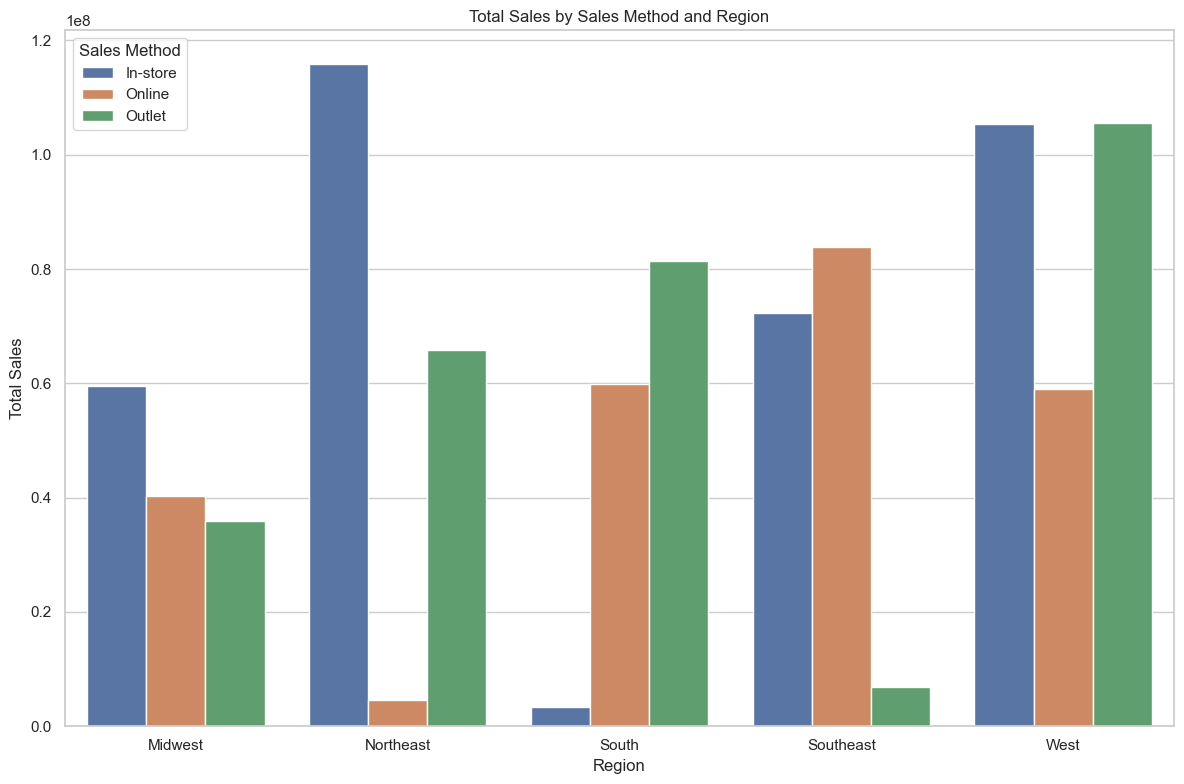

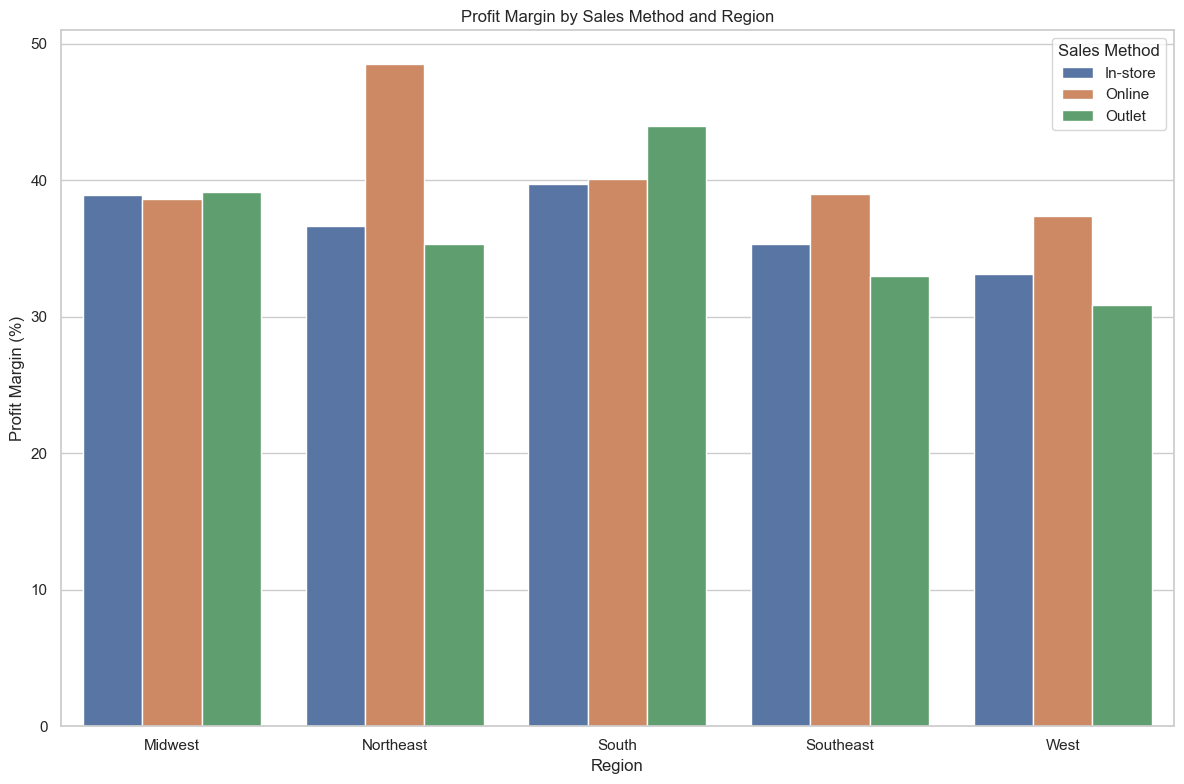

In [59]:
### Visualizations

# Plotting Total Sales by Sales Method and Region
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Total Sales', hue='Sales Method', data=method_efficiency)
plt.title('Total Sales by Sales Method and Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Sales Method')
plt.tight_layout()
plt.show()

# Plotting Profit Margin by Sales Method and Region
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Profit Margin', hue='Sales Method', data=method_efficiency)
plt.title('Profit Margin by Sales Method and Region')
plt.xlabel('Region')
plt.ylabel('Profit Margin (%)')
plt.legend(title='Sales Method')
plt.tight_layout()
plt.show()


Month
1     71479142.0
2     61100153.0
3     56809109.0
4     72339970.0
5     80507695.0
6     74747372.0
7     95480694.0
8     92166201.0
9     77661459.0
10    63911033.0
11    67857340.0
12    85841957.0
Name: Total Sales, dtype: float64


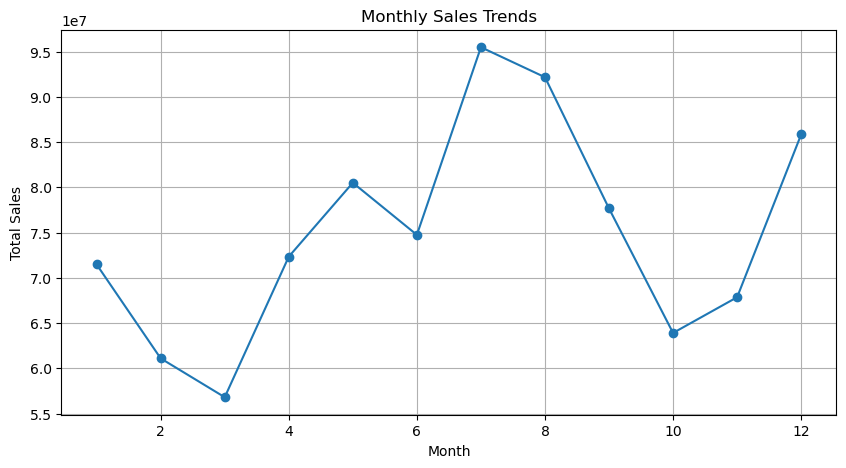

In [5]:
### Business Problem 6: Seasonal Sales Analysis


data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
data['Month'] = data['Invoice Date'].dt.month
monthly_sales = data.groupby('Month')['Total Sales'].sum()
print(monthly_sales)

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


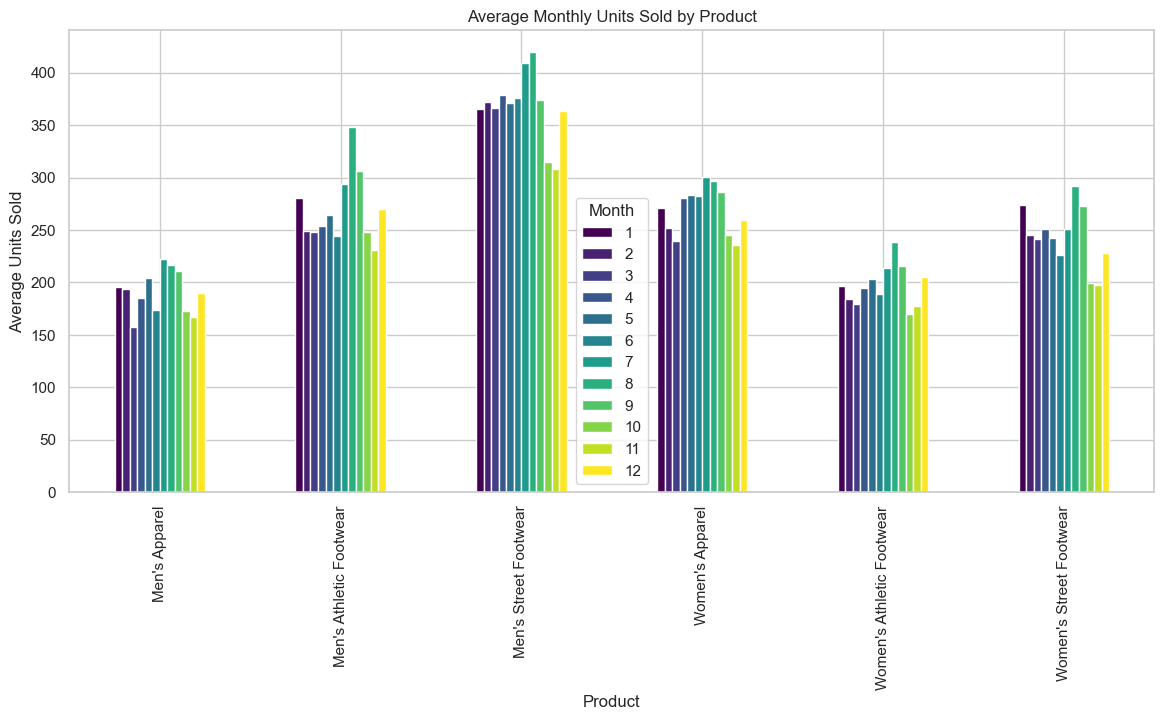

In [53]:
### Seasonal Products Identification

seasonal_products = data.groupby(['Product', 'Month'])['Units Sold'].mean().unstack()
seasonal_products.plot(kind='bar', figsize=(14, 6), colormap='viridis')
plt.title('Average Monthly Units Sold by Product')
plt.xlabel('Product')
plt.ylabel('Average Units Sold')
plt.legend(title='Month')
plt.show()


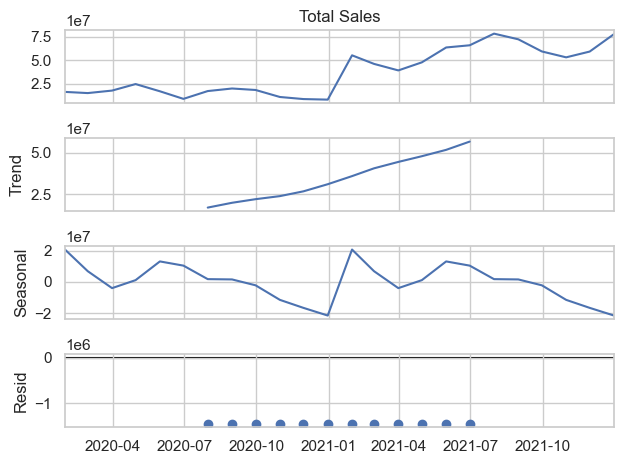

In [62]:
### Business Problem 7: Time Series Decomposition
# Load the dataset
file_path = r'C:\Users\91944\OneDrive\Desktop\Sudheer\Side Projects\Adidas\Dataset\Adidas US Sales Datasets.xlsx'
data = pd.read_excel(file_path)

import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
data.set_index('Invoice Date', inplace=True)

# Ensure data is in proper format and aggregated by date
monthly_sales = data['Total Sales'].resample('M').sum()

# Decompose the time series
result = seasonal_decompose(monthly_sales, model='additive')

print(result)

# Plot the decomposed components
result.plot()
plt.show()


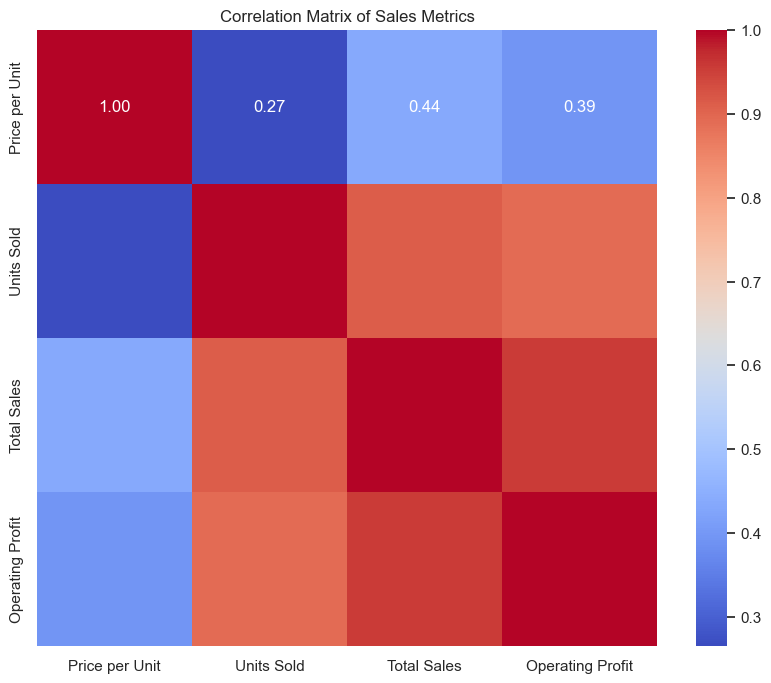

In [63]:
### Business Problem 8: Correlation and Causation Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data[['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit']].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Sales Metrics')
plt.show()


In [66]:
### Casual Analysis

## Assuming 'Total Sales' and 'Operating Profit' show a strong correlation
from statsmodels.formula.api import ols


# Fit a linear regression model using correctly formatted formula
model = ols('Q("Operating Profit") ~ Q("Total Sales")', data=data).fit()
print(model.summary())



                              OLS Regression Results                             
Dep. Variable:     Q("Operating Profit")   R-squared:                       0.915
Model:                               OLS   Adj. R-squared:                  0.915
Method:                    Least Squares   F-statistic:                 1.032e+05
Date:                   Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                           13:52:39   Log-Likelihood:            -1.0699e+05
No. Observations:                   9648   AIC:                         2.140e+05
Df Residuals:                       9646   BIC:                         2.140e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept 